# Advanced MLP

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [20]:
import sklearn
sklearn.__version__

'0.21.3'

#  load data

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

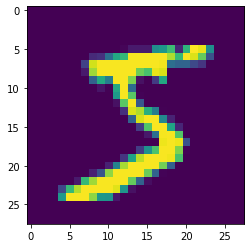

In [31]:
plt.imshow(X_train[0])


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

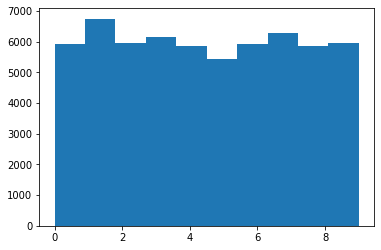

In [32]:
plt.hist(y_train.flatten())

In [33]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [34]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [35]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [37]:
model = Sequential()

In [43]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [44]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

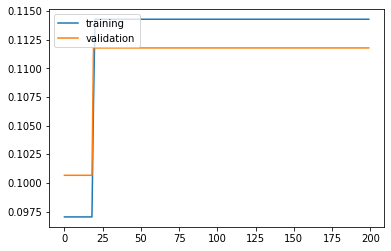

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### 해석
- sigmoid를 사용했기 때문
- x의 범위가 0~255
- w의 범위가 0~1일 때
- wx = 0~255
- simoid(0~255)= 대부분의 값이 1이기 때문에 미분값이 0
- 학습이 잘 안 일어남

In [57]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 22us/step
Test accuracy:  0.11349999904632568


# 1. Weight Initialization¶
> Xavier
- in node, out node의 수로 결정
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

> HE
- out node를 뺀것 
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [62]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer = sgd, loss= 'categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [63]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3,
                   epochs = 100, verbose= 0 )

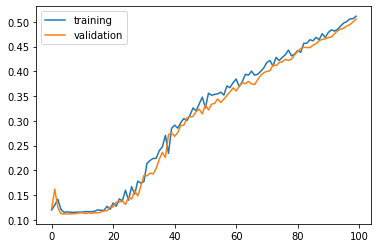

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [65]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [66]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5077999830245972


## 해석
- 결과는 사람마다 다름
- 평균: 0, 표준편차를 정해서 weight의 범위값은 정해주었지만
- 그 안에서 weight가 랜덤으로 나오기 때문에

## 2. Nonlinearity (Activation function)

In [67]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [68]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

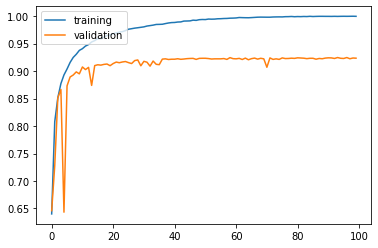

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [30]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 40us/step


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9253000020980835


## 3. Optimizers


In [30]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [31]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

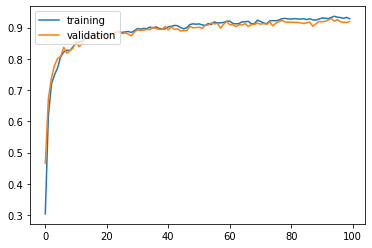

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [34]:
results = model.evaluate(X_test, y_test)

# results[0]: loss
# results[1]: accuracy

10000/10000 [==============================] - 0s 36us/step


In [35]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9132000207901001


In [70]:
results = model.evaluate(X_test, y_test)

print('Test accuracy: ', results[1])

10000/10000 [==============================] - 0s 21us/step
Test accuracy:  0.9269000291824341


#### 모멘텀을 이용한 수렴 속도 개선

> 아달린
- W = W-(v+a*미분값)
- 원래 변화량에 V를 더 더해서 변화하면 더 많이 변하게 할 수 있음.
- v는 양수여야 함.(더 많은 변화량을 주기 위해서)


> 모멘텀
- 진행중인 방향으로 관성을 더해 지역 최소점에 빠지지 않도록 함.
- v = a*acost/aw + 
- ( a*acost/aw) t경사하강법을 해서 업데이트 되는 양
- t: roof횟수
- v = r^0(최근 업데이트 한 양) + r^1(그전에 업데이트 한 양) + r^2(전전에 업데이트한 양) + ...+ r^n(처음 업데이트 한 양)
- r이 0~1사이의 값이기 때문에 ...반영되는 값이 오래될수록 가중치가 작아짐
- 시간순서에 따라 최근 것에 weight를 많이 주기. 
- 조금만 멀어지는 뒤로 있는 것은 매우 작아짐.
- 가속도가 붙으면 빠르게 가는 컨셉으로...

> 모멘텀의 방식의 옵티마이저는 
- 이미 가속도의 개념이 들어가 있기 때문에
- 학습률을 작게 둬야 함..
- 학습률이 크면 너무 변화량이 너무 큼

## 4. Batch Normalization

> 정규화 방법
- 모든 입력은 다시 정규 분포 형태로 만듦.
- (input - x)/ 표준편차

비선형 변환 전에 추가

In [71]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [72]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

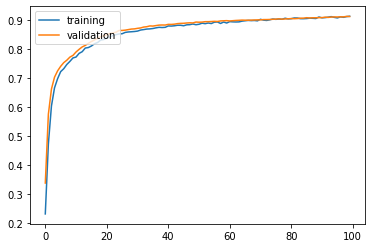

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [74]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/step


In [75]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9133999943733215


### y = ax + b에서 b가 없어도 학습이 가능

> y = ax로 만들기
- 모든 데이터를 평균만큼 빼기
- 데이터를 가운데 (원점 중심으로 )로 옮길 수 있음.

#### scaling
> y = 5000x + 7000이라는 수식에서
- 전체 데이터의 범위를 옮기기
- y = ax에서 x의 범위가 0~255일때
- a가 아무리 작아도 y의 범위가 크기 때문에
- sigmoid하면 1이 많이 나옴 -> scaing 필요

#### batch normalization
- x값을 z-score화 하기(평균1, 표준편차: 0)으로 만들면
- y = ax에서 x값을 조절하였으므로 a값에 대한 변화량이 크지 않음.
- y 값의 범위가 크지 않음.
- batch만큼만.

> z_score화
- 선형변환(사칙 연산으로 이루어짐)
- 보통 비선형변환 전에 이루어짐.
- 선형변환 후 -> 비선형변환해야 함. 

> 비선형변환
- sigmoid 등

> test할 때는
- z score한 값을 다시 원래대로 복원해야 함.



## 5. Dropout (Regularization)

> dropout
- 학습한 weight를 0으로 만들기
- 0.2: 전체 중에 20%의 weight를 0으로 만들기

In [84]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))   
    # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.7))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.4))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [85]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

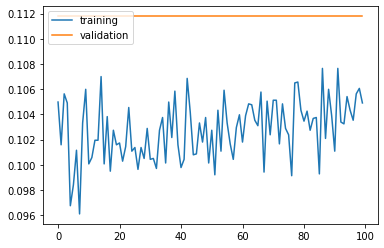

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### 해석
- train이 요동치는 이유: weight를 학습했다가 0으로 만들고, 학습했다가 0으로 만들고...하면서 
    변화가 너무 크기 때문에

### over fitting
> under ftting
- 학습이 안 된것
> appropriate fitting

> over fitting
- epoch가 많아질수록 오버피팅 가능성이 높음.

### dropout
- 학습단계에서 랜덤으로 임의의 뉴런을 선태해 삭제해
- 신호를 더 이상 다음 계층으로 전달하지 않음.

> 효과
>> voteing 효과
- 여러개의 약한 분류기(weak classifier): 대충 학습. 학습이 끝까지 안한 학습기
- 여러 개의 약한 분류기(엑스맨)로 강한 분류기(슈퍼맨)가 만들어짐
- 성능이 낮은 분류기의 개념보다는..다양성의 개념이 중요
- 약한 분류기이므로 분류기마다 다양한 답을 도출함. -> 그래도 너무 틀린답을 도출하면 안되니까...얼마나 학습을 해야 하는지가 관건...정해진 건 없음...

>> co adaption
- 가중치가 [72.2, 0.01, -0.02라면]
- 첫번재 뉴런의 가중치가 너무 크면 독재자
- 다른 뉴런들은 효과가 없엊ㅁ.
- 하나의 강력한 뉴런이 있으면, 다른 뉴런들이 학습이 잘 되어도 강한 뉴런의 효과만 반영되므로 
- 랜덤으로 없애기 때문에 강한 애를 없앨수도 있고, 학습이 잘 된 뉴런을 없앨 수도 있지만, 확룔적으로하기도 하고 여러번 epoch를 하기 때문에 괜찮음


#### 앙상블 방법을 사용한 분류기 성능 개선 사례
> 약한 분류기: 
- 선형만 가능

> 강한 분류기
- 비선형 가능

> 약한 선형 분류기 3개를 합치면 
- 강한 분류기를 만들 수 있음.
- 다수결 방식으로 
- 약한 분류기: 대충 학습 시켜야 함(오류들이 있기 때문에)


#### 앙상블 방법을 사용한 분류기 성능 개선 사례2
> 얼굴 검출기
- 단순한 검출기를 수만개를 사용해서 
- 얼굴 검출

#### 신경망 미니 배치 앙상블
- 미니 배치 데이터 만큼 다른 데이터를 가지고 학습하기 때문에
- 각각 다른 신경망이 만들어짐.
- 서로 다른 의결을 내는 약한 신경망의 개념

> dropout의 개념으로
- 각기 다른 데이터로 학습한 신경망의 노드가 모두 다르기 때문에 
- ( 이건 내가 이해한 개념: 실제로는 네트워크ㅏ 1개이지만, 각기 다른 신경망이 만들어지는 개념이므로 )
- **실제로 한개의 네트워크지만, 드롭아웃이 적용되서, 분리된 신경망처럼 보임.**
- (여러개의 약한 신경망을 쓰는 개념)
- dropout은 크게 써야 함 -> 신경망이 분리되는 개념
- **그러나 dropout을 너무 크게 쓰면....학습한 weight를 0으로 처리하므로, 성능이 너무 낮아짐**

#### 다양성 역설
> 강한 분류기
- 성능이 좋기 때문에 모두 정답 -> diversity가 낮음
- 앙상블해도 성능이 변하지 않음.

> 약한 분류기
- 성능이 안좋기 때문에 diversity가 높음.
- 인식률은 중간, diversity가 높기 때문
- 같은 데이터를 줬을 떼 다양한 정답을 줘야 함. -> voting을 해서 성능을 높이기


> 인식률도 낮고, 다양성도 낮은 분류기
- 효과가 없음.

## 6. Model Ensemble

- one hot 인고딩된 레이블을 원래 label인코딩으로 바꾸기

In [87]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [88]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

- week classifier 3개 사용

In [89]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)

> hard
- 다수결
- 분류기마다 가중치를 모두 같게 설정하기

> soft
- 분류기마다 가중치를 다르게 설정하기
- validation set으로 평가한 결과를 가중치에 반영하기



In [92]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [93]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E76C76E188>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E76C76ED48>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E761D5BCC8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [94]:
y_pred = ensemble_clf.predict(X_test)

In [95]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.3189


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [3]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [11]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 3 )
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [12]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [13]:
ensemble_clf.fit(X_train, y_train)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.7411 - accuracy: 0.7750
Epoch 2/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.4262 - accuracy: 0.8778
Epoch 3/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.3617 - accuracy: 0.8973
Epoch 1/3
60000/60000 [==============================] - 4s 64us/step - loss: 0.7538 - accuracy: 0.7699
Epoch 2/3
60000/60000 [==============================] - 4s 59us/step - loss: 0.4346 - accuracy: 0.8760
Epoch 3/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.3659 - accuracy: 0.8942


VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BFAC60E08>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021BFAC60E48>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [14]:
y_pred = ensemble_clf.predict(X_test)

In [72]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9583


> 앙상블 효과
- VARIATION이 줄어듦. 모델을 사용할 때마다 정확도가 다른데
- 스무딩 효과가 있음.
- 성능 개선이 되지만, 공부할 때는 이 방법으로는 비효율적